<a href="https://colab.research.google.com/github/Krushikkk/Netflix-Movies-and-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -** Kishan Hirapara
##### **Team Member 2 -** Krushik Kalavadiya


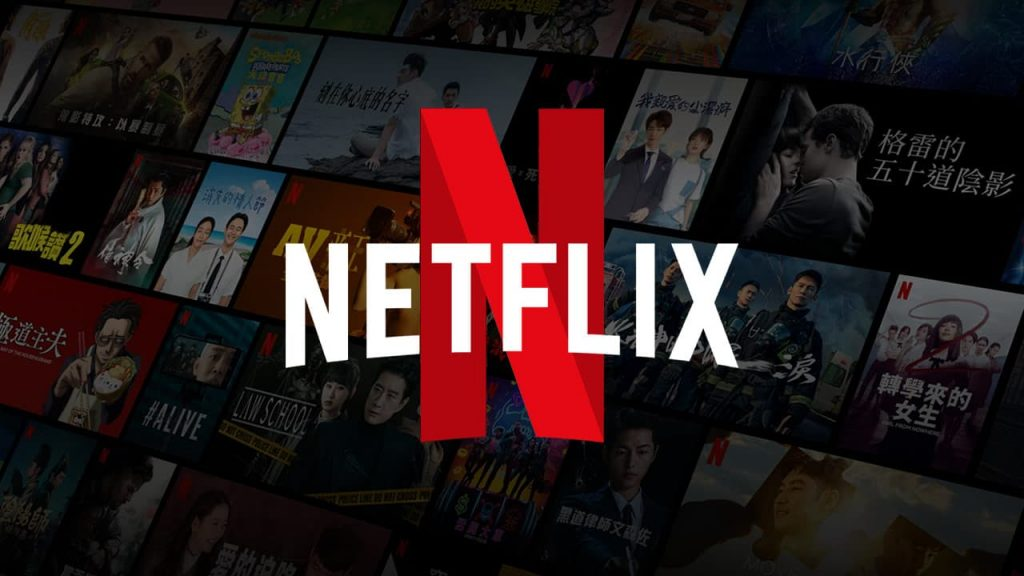

# **Project Summary -**

**Introduction:**

Netflix, one of the largest streaming platforms, has a vast library of movies and TV shows, which makes it difficult for users to find the content they are interested in. Clustering similar movies and TV shows based on their attributes such as genre, release year, rating, etc., can be a solution to this problem. This project aims to use unsupervised machine learning algorithms to cluster similar movies and TV shows and provide personalized recommendations to users.


**Objective:**

The main objective of this project is to create a clustering model that groups similar movies and TV shows based on their attributes without any prior knowledge of their labels or categories. The ultimate goal is to improve the user experience on the Netflix platform by providing personalized recommendations that match the user's interests.

**Approach:**

Data Collection: Collecting data about movies and TV shows from the Netflix platform and other external sources.

Data Preprocessing: Cleaning and processing the collected data to remove any inconsistencies and transform it into a suitable format for clustering.

Feature Engineering: Selecting relevant attributes such as genre, release year, rating, etc., and extracting meaningful features from the data.

Clustering: Using unsupervised machine learning algorithms such as k-means, hierarchical clustering, etc., to cluster the movies and TV shows based on their attributes.
Model Evaluation: Evaluating the clustering model's performance using appropriate metrics such as silhouette score, Dunn index, etc.

Personalized Recommendations: Using the clustering results to provide personalized recommendations to users based on their viewing history and preferences.

Overall, this project will use unsupervised machine learning algorithms to cluster similar movies and TV shows and provide personalized recommendations to user

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**"Netflix, one of the leading streaming platforms, has a large collection of movies and TV shows. However, with such a vast library, it can be difficult for users to find content that they are interested in. The goal of this project is to use unsupervised machine learning techniques to cluster similar movies and TV shows based on their attributes such as genre, release year, rating, etc. This will enable Netflix to provide personalized recommendations to users based on their viewing history and preferences."**


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
sns.set_theme(style= 'whitegrid', palette = 'mako')
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from numpy import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import nltk 
nltk.download('all',quiet=True)
# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

import pylab as pl
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

#stop-words

nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df_original = pd.read_csv('/content/drive/MyDrive/Project/Project 5/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# Copying data to preserve orignal file
df = df_original.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

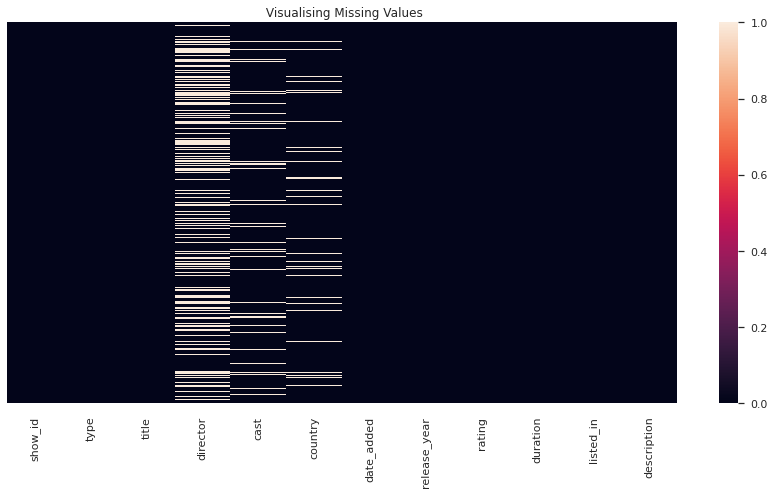

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(), annot=False, yticklabels=False)
plt.title(" Visualising Missing Values")

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include ='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [ ]:
# Value Counts of cast
df['cast'].value_counts()

David Attenborough                                                                                                                                                            18
Samuel West                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                    7
Kevin Hart                                                                                                                                                                     6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath                                                         6
                                                                                                                   

In [ ]:
# Value Counts of rating
# Choosing the primary genre to simplify the analysis
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])
df['listed_in'].value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           690
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         359
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 232
Docuseries                       194
Anime Series                     148
International Movies             114
TV Comedies                      110
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             37
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Classic & Cult TV                 21
Independent Movies                20
Anime Features                    19
Music & Musicals                  17
T

In [ ]:
# Value Counts of rating
df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df.shape

(7777, 12)

In [ ]:
# Create a new features
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day 
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [ ]:
# Checking for head after seperating date ,month,year
df[["date_added","year_added","month_added"]].head()

,date_added,year_added,month_added
0,2020-08-14,2020,8
1,2016-12-23,2016,12
2,2018-12-20,2018,12
3,2017-11-16,2017,11
4,2020-01-01,2020,1


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

We already done.

### 2. Handling Outliers

We don't required outlier treatment because we don't have variables with outlier.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# We will be using text columns to create clusters for our data.

cluster_df = df[['title']]
df[['description','listed_in','director','cast','country']] = df[['description','listed_in','director','cast','country']].astype(str)
cluster_df['cluster_data'] = (df['description'] + ' ' + df['listed_in'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'])
cluster_df.set_index('title', inplace = True)
cluster_df.head()

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


#### 1. Expand Contraction

In [ ]:
# Expand Contraction
import re
# Define a function to expand contractions
def expand_contractions(text):
    contraction_patterns = [(r'won\'t', 'will not'), (r'can\'t', 'cannot'), (r'that\'s', 'that is'), (r'i\'m', 'i am'),
                            (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                            (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'),
                            (r'(\w+)\'d', '\g<1> would'), (r'daughter\'s', 'daughter is'),
                            (r'son\'s', 'son is'), (r'(\w+)ic', '\g<1>')]
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text)
    return text

In [ ]:
# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(expand_contractions)
cluster_df.head()

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,"After a devastating earthquake hits Mexo City,..."
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalypt world, rag-doll robots hide..."
21,A brilliant group of students become card-coun...


#### 2. Lower Casing

In [ ]:
# Lower Casing
# Define the function to apply lower casing
def lowercase_text(text):
    return text.lower()

# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(lowercase_text)
cluster_df.head()

,cluster_data
title,
3%,in a future where the elite inhabit an island ...
7:19,"after a devastating earthquake hits mexo city,..."
23:59,"when an army recruit is found dead, his fellow..."
9,"in a postapocalypt world, rag-doll robots hide..."
21,a brilliant group of students become card-coun...


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# Define the function to remove punctuations
def remove_punctuation(text):
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head() 

,cluster_data
title,
3%,in a future where the elite inhabit an island ...
7:19,after a devastating earthquake hits mexo city ...
23:59,when an army recruit is found dead his fellow ...
9,in a postapocalypt world ragdoll robots hide i...
21,a brilliant group of students become cardcount...


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# find rows with links in cluster_data
link_rows = cluster_df[cluster_df['cluster_data'].str.contains(r'http|www')]
top_5_link_rows = link_rows.sort_values(by='cluster_data', ascending=False).head(5)
top_5_link_rows

,cluster_data
title,


In [ ]:
# Remove URLs & Remove words and digits contain digits
# Define a function to remove words which containing digits
def remove_digits(text):
    text = re.sub(r'\w*\d\w*', '', text).strip()
    return text

# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_digits)
cluster_df.head()  

,cluster_data
title,
3%,in a future where the elite inhabit an island ...
7:19,after a devastating earthquake hits mexo city ...
23:59,when an army recruit is found dead his fellow ...
9,in a postapocalypt world ragdoll robots hide i...
21,a brilliant group of students become cardcount...


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define a function to remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_stopwords)
cluster_df.head()       

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cluster_data
title,
3%,future elite inhabit island paradise far crowd...
7:19,devastating earthquake hits mexo city trapped ...
23:59,army recruit found dead fellow soldiers forced...
9,postapocalypt world ragdoll robots hide fear d...
21,brilliant group students become cardcounting e...


#### 6. Tokenization

In [ ]:
# Tokenization
# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(lambda x: word_tokenize(x))
cluster_df.head()       

,cluster_data
title,
3%,"[future, elite, inhabit, island, paradise, far..."
7:19,"[devastating, earthquake, hits, mexo, city, tr..."
23:59,"[army, recruit, found, dead, fellow, soldiers,..."
9,"[postapocalypt, world, ragdoll, robots, hide, ..."
21,"[brilliant, group, students, become, cardcount..."


#### 7. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Download the necessary NLTK data
nltk.download('wordnet')

# Define a function to lemmatize a list of tokens
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(lambda x: lemmatize_tokens(x))
cluster_df.head()   

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,cluster_data
title,
3%,"[future, elite, inhabit, island, paradise, far..."
7:19,"[devastating, earthquake, hit, mexo, city, tra..."
23:59,"[army, recruit, found, dead, fellow, soldier, ..."
9,"[postapocalypt, world, ragdoll, robot, hide, f..."
21,"[brilliant, group, student, become, cardcounti..."


##### Which text normalization technique have you used and why?

Answer Here.

#### 8. Text Vectorization

In [ ]:
bag_of_words = cluster_df.cluster_data

In [ ]:
# Vectorizing Text
# Define a function of Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus 
vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False, max_features = 20000)    
X = vectorizer.fit_transform(bag_of_words)
print(X.shape)

(7777, 20000)


In [ ]:
type(X)

scipy.sparse._csr.csr_matrix

In [ ]:
# Convert type of X to array  
X = X.toarray()

##### Which text vectorization technique have you used and why?

Answer Here.

### 5. Dimesionality Reduction

In [ ]:
# Dimesionality Reduction
pca = PCA()
pca.fit(X)

PCA()

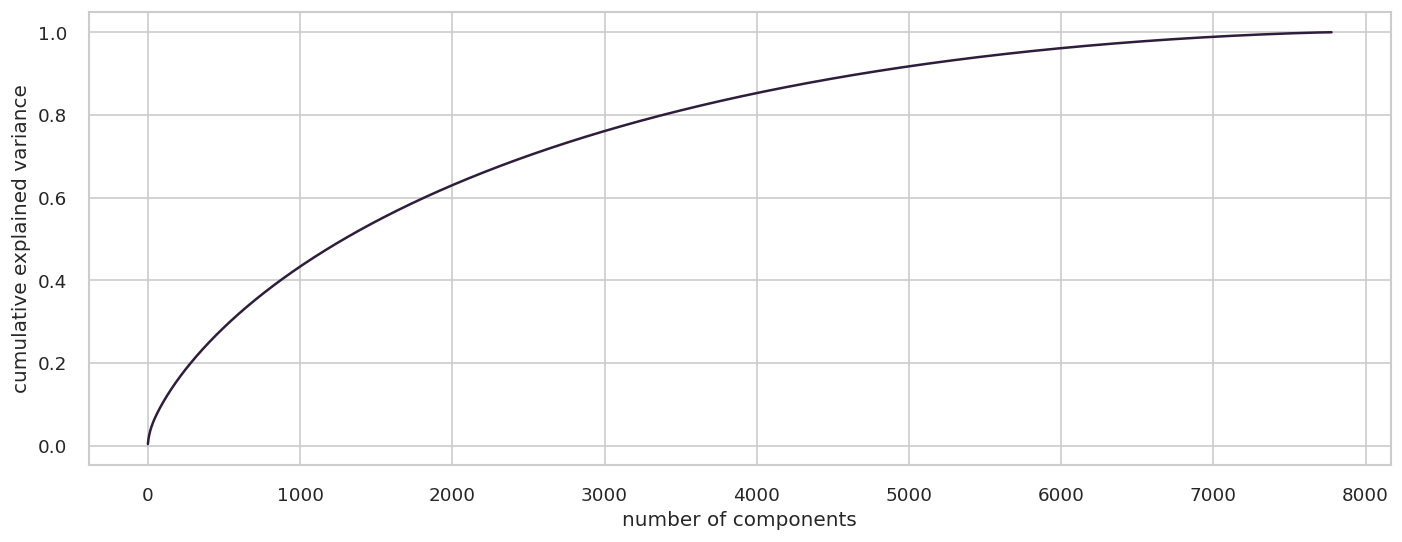

In [ ]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X)
X_transformed = pca_tuned.transform(X)
X_transformed.shape

(7777, 5695)

In [ ]:
X_transformed

array([[ 3.48277782e-02,  6.04029479e-02, -4.87948967e-03, ...,
        -3.51777711e-03,  1.09586103e-03,  4.61106951e-03],
       [-3.35515430e-02,  1.17018714e-02,  1.87966933e-02, ...,
         1.14974708e-03, -3.04654275e-03, -2.14900438e-03],
       [-3.58450820e-02,  1.94060386e-02, -5.25924219e-02, ...,
         1.75427150e-03, -1.30774698e-03, -1.14354683e-04],
       ...,
       [ 1.46172580e-01, -3.30553517e-02,  1.18718640e-01, ...,
         4.72287557e-03,  7.18401410e-03,  3.96224223e-03],
       [ 4.69434144e-02,  4.80921948e-02, -3.24510091e-03, ...,
         5.19882544e-03,  6.99071472e-03,  6.62980212e-03],
       [ 1.91863526e-01, -1.91364789e-01,  1.51547717e-01, ...,
        -5.12777205e-03,  8.14172441e-03, -7.62450503e-03]])

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

ValueError: ignored

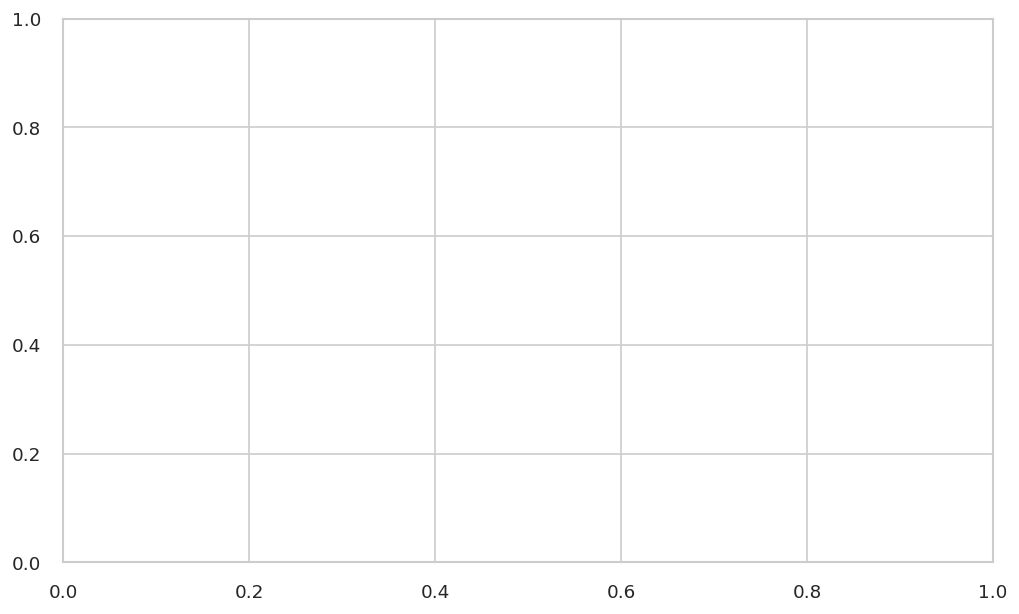

In [ ]:
# Elbow method to find the optimal value of k
plt.figure(figsize=(10,6), dpi=120)
wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
    
# Plot chart    
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
pip install yellowbrick

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(4,22), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(X_transformed)
visualizer.show()

In [ ]:
# ML Model - 1 Implementation
plt.figure(figsize=(10,6), dpi=120)

# Fit the Algorithm
kmeans= KMeans(n_clusters=10, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(X_transformed)

#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***